## UZOP PROJEKT - DRUGI DIO
# Priprema i vizualizacija podataka

Autor: Lucija Lovrić, 0036540890

**Opis skupa podataka**

Skup podataka "Open University Learning Analytics Dataset" (OULAD) anonimizirani je skup podataka koji sadrži informacije o studentima i njihovim interakcijama u online okruženju za učenje na Open University u Ujedinjenom Kraljevstvu (UK). Ovaj skup podataka obuhvaća 32 593 studenata upisana na 7 online kolegija.

Podaci uključuju demograske (spol, dobna skupina, razina obrazovanja, invaliditet), kao i bihevioralne varijable (broj klikova u VLE-u, datum registracije, prethodni pokušaji polaganja kolegija, rezultat prvog zadatka). Ciljnu varijablu predstavlja konačni ishod studenta koja može biti klasificirana u 4 kategorije: Withdrawn (povlačenje sa studija), Fail (pad), Pass (prolaz) i Distinction (dobivanje posebnog priznanja).

# Učitavanje podataka

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
student_info = pd.read_csv("anonymisedData/studentInfo.csv")
student_vle = pd.read_csv("anonymisedData/studentVle.csv")
vle = pd.read_csv("anonymisedData/vle.csv")
assessments = pd.read_csv("anonymisedData/assessments.csv")
student_assessments = pd.read_csv("anonymisedData/studentAssessment.csv")
courses = pd.read_csv("anonymisedData/courses.csv")
student_registration = pd.read_csv("anonymisedData/studentRegistration.csv")


In [3]:
df = pd.merge(
    student_info,
    student_registration,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)

student_vle_agg = (
    student_vle
    .groupby(["id_student", "code_module", "code_presentation"], as_index=False)
    ["sum_click"]
    .sum()
)

df = pd.merge(
    df,
    student_vle_agg,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)

df = pd.merge(
    df,
    courses,
   on=["code_module", "code_presentation"],
    how="left"
)

first_assessment = (
    student_assessments
    .merge(assessments, on="id_assessment")
    .sort_values("date_submitted")
    .groupby(["id_student", "code_module", "code_presentation"], as_index=False)
    .first()
    [["id_student", "code_module", "code_presentation", "score"]]
)

df = pd.merge(
    df,
    first_assessment,
    on=["id_student", "code_module", "code_presentation"],
    how="left"
)


In [4]:
df.shape

(32593, 17)

Dataframe sadrži 32593 zapisa, pri čemu svaki red predstavlja jednog studenta upisanog na određeni kolegij u konkretnoj izvedbi. Podaci uključuju akademske i demografske varijable.

In [5]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,sum_click,module_presentation_length,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,934.0,268,78.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN,1435.0,268,70.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0,281.0,268,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN,2158.0,268,72.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN,1034.0,268,69.0


In [6]:
print(f"U ovom dataframe-u stupce čini {len(df.columns)} kategorija: \n", df.columns)

U ovom dataframe-u stupce čini 17 kategorija: 
 Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'date_unregistration', 'sum_click', 'module_presentation_length',
       'score'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 32593 non-null  object 
 1   code_presentation           32593 non-null  object 
 2   id_student                  32593 non-null  int64  
 3   gender                      32593 non-null  object 
 4   region                      32593 non-null  object 
 5   highest_education           32593 non-null  object 
 6   imd_band                    31482 non-null  object 
 7   age_band                    32593 non-null  object 
 8   num_of_prev_attempts        32593 non-null  int64  
 9   studied_credits             32593 non-null  int64  
 10  disability                  32593 non-null  object 
 11  final_result                32593 non-null  object 
 12  date_registration           32548 non-null  float64
 13  date_unregistration         100

Prema ovom ispisu zaključujemo da su numerički stupci id_student, num_of_prev_attempts, studied_credits, date_registration, date_unregistration, sum_click, module_presentation_length i score. Ostali stupci su kategorijski.

**Pojašnjenja značajki**:  

 - **code_module** - šifra kolegija  
 - **code_presentation** - izvedba kolegija  
 - **id_student** - ID studenta  
 - **gender** - spol studenta  
 - **region** - regija prebivališta  
 - **highest_education** - najviša razina obrazovanja koju je student ostvario  
 - **imd_band** - socioekonomski status studenta  
 - **age_band** - dobna skupina  
 - **num_of_prev_attempts** - broj prethodnih pokušaja polaganja kolegija  
 - **studied_credits** - broj bodova koje je student ostvario do trenutka bilježenja zapisa  
 - **disability** - invaliditet  
 - **final_result** - završni ishod kolegija, ciljna varijabla  
 - **date_registration** - dan registracije u odnosu na početka držanja kolegija  
 - **date_unregistration** - dan odjavljivanja s kolegija, prisutan samo kod studenata koji su napustili kolegij  
 - **sum_click** - ukupan broj klikova studenta u virtualnom okruženju za učenje  
 - **module_presentation_length** - trajanje kolegija u danima  
 - **score** - rezultat prvog zadatka


In [8]:
print("Prikaz mogućih vrijednosti kategorijskih varijabli:")
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())

Prikaz mogućih vrijednosti kategorijskih varijabli:

code_module:
['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']

code_presentation:
['2013J' '2014J' '2013B' '2014B']

gender:
['M' 'F']

region:
['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']

highest_education:
['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']

imd_band:
['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']

age_band:
['55<=' '35-55' '0-35']

disability:
['N' 'Y']

final_result:
['Pass' 'Withdrawn' 'Fail' 'Distinction']


## Provjera monotonih vrijednosti

In [9]:
df.nunique()

code_module                       7
code_presentation                 4
id_student                    28785
gender                            2
region                           13
highest_education                 5
imd_band                         10
age_band                          3
num_of_prev_attempts              7
studied_credits                  61
disability                        2
final_result                      4
date_registration               332
date_unregistration             416
sum_click                      5380
module_presentation_length        7
score                           100
dtype: int64

Zaključujemo da u ovom dataframe-u nema monotonih vrijednosti. U ovom slučaju kandidat za monotoni atribut bi bio id_student kada bi svaki zapis jednoznačno govorio sve informacije o jednom studentu. Za studenta je moguće da više puta upiše neki kolegij (course) pa se njegov id_student može nalaziti u nekoliko zapisa u ovom dataframe-u. Zbog toga je broj zapisa veći od broja studenata o kojima se zapisi rade.

## Provjera nedostajućih vrijednosti i nadomještavanje

In [10]:
print("Prikaz koliko vrijednosti svake kategorije (stupca) čine NA vrijednosti: ")
df.isna().sum()

Prikaz koliko vrijednosti svake kategorije (stupca) čine NA vrijednosti: 


code_module                       0
code_presentation                 0
id_student                        0
gender                            0
region                            0
highest_education                 0
imd_band                       1111
age_band                          0
num_of_prev_attempts              0
studied_credits                   0
disability                        0
final_result                      0
date_registration                45
date_unregistration           22521
sum_click                      3365
module_presentation_length        0
score                          6773
dtype: int64

Komentar za numerički stupac date_unregistration (digresija):

In [11]:
print("Broj studenata koji se nisu povukli s kolegija: ")
(df["final_result"] != "Withdrawn").sum()

Broj studenata koji se nisu povukli s kolegija: 


np.int64(22437)

In [12]:
print("Studenti koji imaju Withdrawn ishod, ali nemaju zabilježen datum odjave:")

df[
    (df["final_result"] == "Withdrawn") &
    (df["date_unregistration"].isna())
].groupby("id_student").size().sort_values(ascending=False).head()



Studenti koji imaju Withdrawn ishod, ali nemaju zabilježen datum odjave:


id_student
64777     1
149964    1
197188    1
227826    1
271047    1
dtype: int64

Iz analize je vidljivo da u numeričkom stupcu date_unregistration postoji 22 521 zapis s nedostajućim vrijednostima. U istom DataFrameu nalazi se 22 437 zapisa studenata koji nisu odustali od kolegija (final_result ≠ Withdrawn), što ukazuje na manju razliku od 84 zapisa koja zahtijeva dodatno objašnjenje.

Dodatnom provjerom utvrđeno je da postoji vrlo mali broj studenata (pet slučajeva) s ishodom Withdrawn kod kojih nije zabilježen datum odjave s kolegija. Ovi zapisi predstavljaju rijetke nedosljednosti u evidenciji podataka, a ne višestruke stvarne odjave ili ponovne upise studenata. Također, dio neslaganja može se objasniti strukturom skupa podataka i činjenicom da se studenti mogu pojavljivati u više zapisa zbog spajanja tablica različite granularnosti.

S obzirom na to da varijabla date_unregistration sadrži strukturno nedostajuće vrijednosti, snažno je povezana s ciljnom varijablom (final_result) te predstavlja informaciju dostupnu tek nakon završetka studijskog procesa, zaključeno je da njezino uključivanje u daljnju analizu i modeliranje nije opravdano. Stoga je ova značajka izostavljena iz konačnog skupa podataka

### Nadomještanje nepostojećih vrijednosti numeričkih varijabli

In [13]:
df["date_registration"] = df["date_registration"].fillna(
    df["date_registration"].median()
)

df = df.drop(columns=["date_unregistration"])

df["sum_click"] = df["sum_click"].fillna(0)

df["score"] = df["score"].fillna(0)


### Nadomještanje nepostojećih vrijednosti kategorijskih varijabli

In [14]:
df["imd_band"] = df["imd_band"].fillna("Unknown")

Nedostajuće vrijednosti u:

- **date_registration** zamijenjujemo medijanom jer se radi o numeričkom stupcu s malim udjelom nedostajućih vrijednosti
- **date_unregistration** izbacujemo iz skupa podataka jer sadrži velik udio nedostajućih vrijednosti
- **sum_click** zamijenjujemo s 0 jer nedostajuća vrijednost najvjerojatnije označava nepostojeću aktivnost
- **score** zamijenjujemo s 0 jer nedostajuća vrijednost najvjerojatnije označava 0 ostvarenih bodova na prvom zadatku
- **imd_band** zamijenjujemo s novom vrijednosti "Unknown" jer bismo uklanjanjem izgubili otprilike 4% podataka, a nismo sigurni daju li nam informacije ostalih stupaca tog zapisa neku vrijednost

Provjera postojanja nedostajućih vrijednosti nakon nadomještanja

In [15]:
df.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
date_registration             0
sum_click                     0
module_presentation_length    0
score                         0
dtype: int64

In [16]:
df.shape

(32593, 16)

## Provjera konstantnih vrijednosti

Iz poziva df.nunique() zaključujemo da u ovom dataframe-u nema konstantnih vrijednosti.

## Provjera stršećih vrijednosti

In [17]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits,date_registration,sum_click,module_presentation_length,score
count,3.259300e+04,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691,-69.394164,1215.141257,256.010125,57.810604
std,5.491673e+05,0.479758,41.071900,49.228660,1692.604449,13.179078,35.180523
min,3.733000e+03,0.000000,30.000000,-322.000000,0.000000,234.000000,0.000000
25%,5.085730e+05,0.000000,60.000000,-100.000000,142.000000,241.000000,33.000000
50%,5.903100e+05,0.000000,60.000000,-57.000000,602.000000,262.000000,70.000000
75%,6.444530e+05,0.000000,120.000000,-29.000000,1585.000000,268.000000,85.000000
max,2.716795e+06,6.000000,655.000000,167.000000,24139.000000,269.000000,100.000000


Na prvi pogled možemo zaključiti da bi se stršeći podaci mogli nalaziti unutar varijabli id_student, num_of_prev_attempts, studied_credits, date_registration i sum_click. U nastavku to i pokazujemo.

**Stršeće vrijednosti ispod lower whisker**

In [18]:
numeric_cols = df.select_dtypes(include="number").columns
numeric_cols

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_counts_Q1 = (
    (df[numeric_cols] < (Q1 - 1.5 * IQR))
    .sum()
)

outlier_counts_Q1.sort_values(ascending=False)


id_student                    2979
date_registration              332
num_of_prev_attempts             0
studied_credits                  0
sum_click                        0
module_presentation_length       0
score                            0
dtype: int64

**Stršeće vrijednosti iznad upper whisker**

In [19]:

outlier_counts_Q3 = (
    (df[numeric_cols] > (Q3 + 1.5 * IQR))
    .sum()
)

outlier_counts_Q3.sort_values(ascending=False)

num_of_prev_attempts          4172
id_student                    3481
sum_click                     2503
studied_credits                350
date_registration                7
module_presentation_length       0
score                            0
dtype: int64

In [20]:
df.sort_values(by="sum_click").tail(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,sum_click,module_presentation_length,score
28440,FFF,2014J,617580,F,South Region,Lower Than A Level,40-50%,0-35,0,60,Y,Pass,-34.0,17481.0,269,82.0
28535,FFF,2014J,630905,M,Wales,HE Qualification,50-60%,0-35,0,120,N,Distinction,-95.0,17825.0,269,80.0
23700,FFF,2013B,560431,M,South West Region,A Level or Equivalent,70-80%,35-55,0,60,N,Distinction,-20.0,18039.0,240,100.0
25957,FFF,2013J,898594,F,West Midlands Region,HE Qualification,60-70%,55<=,0,60,N,Pass,-38.0,19126.0,268,98.0
28720,FFF,2014J,644361,F,North Western Region,Lower Than A Level,40-50%,35-55,0,120,N,Pass,-148.0,19415.0,269,80.0
28283,FFF,2014J,583487,M,Scotland,Lower Than A Level,90-100%,35-55,0,60,N,Pass,-92.0,19461.0,269,89.0
24225,FFF,2013J,368315,M,London Region,Lower Than A Level,30-40%,0-35,0,120,Y,Pass,-31.0,19734.0,268,100.0
11824,CCC,2014J,611417,F,North Region,Lower Than A Level,Unknown,35-55,0,60,N,Pass,-29.0,20391.0,269,100.0
22952,FFF,2013B,517269,M,Yorkshire Region,Lower Than A Level,0-10%,35-55,1,180,Y,Pass,-15.0,21123.0,240,96.0
10631,CCC,2014J,80868,M,South West Region,Lower Than A Level,80-90%,0-35,0,60,N,Pass,-60.0,24139.0,269,44.0


Vidimo da su stršeće vrijednosti pronađene među numeričkim varijablama id_student, num_of_prev_attempts, sum_click, studied_credits, date_registration. Kategoriju id_student ignoriramo kao stršeću vrijednost jer ona označava samo ID studenta i daje identifikacijsku informaciju o studentu. Također, vrijednosti varijable num_of_prev_attempts nećemo mijenjati jer ona označava koliko je puta student upisivao određen predmet (course), a vrijednosti koje dobivamo (0-6) su realne i informativne. sum_click prikazuje koliko je student imao klikova na stranici, a visoke vrijednosti te varijable su i poželjne jer se ovdje u većini slučajeva radi o jako aktivnim studentima što je poželjno. Ovdje bismo mogli malo ublažiti utjecaj odbacivanjem ekstremnih vrijednosti. U gornjoj tablici su prikazane informacije o 10 studenata koji su imali najviše klikova u VLE-u. Vidimo da je 9/10 studenata prošlo predmet iz prve i da ih je 2/10 prošlo s iznimnom pohvalom. studied_credits prikazuje broj bodova koje je student do tada ostavario na studiju. Malen je udio studenata koji su ostvarili iznimno visoke rezultate pa i taj utjecaj bismo mogli nešto smanjiti. date_registration isto ne mijenjamo jer je moguće da su neki studenti puno ranije/kasnije upisali studij od drugih.

Primjerice, 99. percentil nije optimalan prag za ublažavanje ekstremnih vrijednosti varijabli sum_click i studied_credits zbog izražene asimetrije distribucije (mean > median u oba slučaja). Stoga ćemo to morati ručno odraditi.

In [21]:
print('sum_click > 5000: ', (df.sum_click> 5000).sum())
print('sum_click > 10000: ', (df.sum_click > 10000).sum())
print('sum_click > 15000: ', (df.sum_click > 15000).sum())
print('sum_click > 20000: ', (df.sum_click > 20000).sum())
print('sum_click > 21000: ', (df.sum_click > 21000).sum())
print('sum_click > 22000: ', (df.sum_click > 22000).sum())
print('sum_click > 23000: ', (df.sum_click > 23000).sum())
print('sum_click > 24000: ', (df.sum_click > 24000).sum())

sum_click > 5000:  1284
sum_click > 10000:  126
sum_click > 15000:  26
sum_click > 20000:  3
sum_click > 21000:  2
sum_click > 22000:  1
sum_click > 23000:  1
sum_click > 24000:  1


In [22]:
df.loc[df.sum_click > 20000, "sum_click"]

10631    24139.0
11824    20391.0
22952    21123.0
Name: sum_click, dtype: float64

Za 3 instance vrijednost sum_click prelazi 20000 i njih ćemo izbaciti.

In [23]:
df.drop([10631, 11824, 22952], axis=0, inplace=True)
df.loc[df.sum_click > 20000, "sum_click"]

Series([], Name: sum_click, dtype: float64)

In [24]:
print('studied_credits > 100: ', (df.studied_credits> 100).sum())
print('studied_credits > 200: ', (df.studied_credits > 200).sum())
print('studied_credits > 300: ', (df.studied_credits > 300).sum())
print('studied_credits > 400: ', (df.studied_credits > 400).sum())
print('studied_credits > 500: ', (df.studied_credits > 500).sum())
print('studied_credits > 600: ', (df.studied_credits > 22000).sum())

studied_credits > 100:  8612
studied_credits > 200:  521
studied_credits > 300:  35
studied_credits > 400:  7
studied_credits > 500:  4
studied_credits > 600:  0


In [25]:
df.loc[df.studied_credits > 500, "studied_credits"]

865      585
2778     655
10378    630
16424    540
Name: studied_credits, dtype: int64

Za 4 instance vrijednost studied_credits prelazi 500 i njih ćemo izbaciti.

In [26]:
df.drop([865, 2778, 10378, 16424], axis=0, inplace=True)
df.loc[df.studied_credits > 500, "studied_credits"]

Series([], Name: studied_credits, dtype: int64)

In [27]:
df.to_csv("data_projekt_3.csv", index=False)

In [40]:
df.shape


(32586, 16)

# Vizualizacija podataka

### Korelacije među značajkama

In [28]:
df_corr = df.copy()

df_corr["highest_education_num"] = df_corr["highest_education"].map({
    "No Formal quals": 0,
    "Lower Than A Level": 1,
    "A Level or Equivalent": 2,
    "HE Qualification": 3,
    "Post Graduate Qualification": 4
})

df_corr["age_band_num"] = df_corr["age_band"].map({
    "0-35": 0,
    "35-55": 1,
    "55<=": 2
})

df_corr["imd_band_num"] = df_corr["imd_band"].map({
    "0-10%": 0,
    "10-20": 1,
    "20-30%": 2,
    "30-40%": 3,
    "40-50%": 4,
    "50-60%": 5,
    "60-70%": 6,
    "70-80%": 7,
    "80-90%": 8,
    "90-100%": 9,
    "Unknown": 10
})

df_corr["gender_num"] = df_corr["gender"].map({"F": 0, "M": 1})
df_corr["disability_num"] = df_corr["disability"].map({"N": 0, "Y": 1})

df_corr["final_result_num"] = df_corr["final_result"].map({
    "Withdrawn": 0,
    "Fail": 1,
    "Pass": 2,
    "Distinction": 3
})

In [29]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32586 entries, 0 to 32592
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 32586 non-null  object 
 1   code_presentation           32586 non-null  object 
 2   id_student                  32586 non-null  int64  
 3   gender                      32586 non-null  object 
 4   region                      32586 non-null  object 
 5   highest_education           32586 non-null  object 
 6   imd_band                    32586 non-null  object 
 7   age_band                    32586 non-null  object 
 8   num_of_prev_attempts        32586 non-null  int64  
 9   studied_credits             32586 non-null  int64  
 10  disability                  32586 non-null  object 
 11  final_result                32586 non-null  object 
 12  date_registration           32586 non-null  float64
 13  sum_click                   32586 no

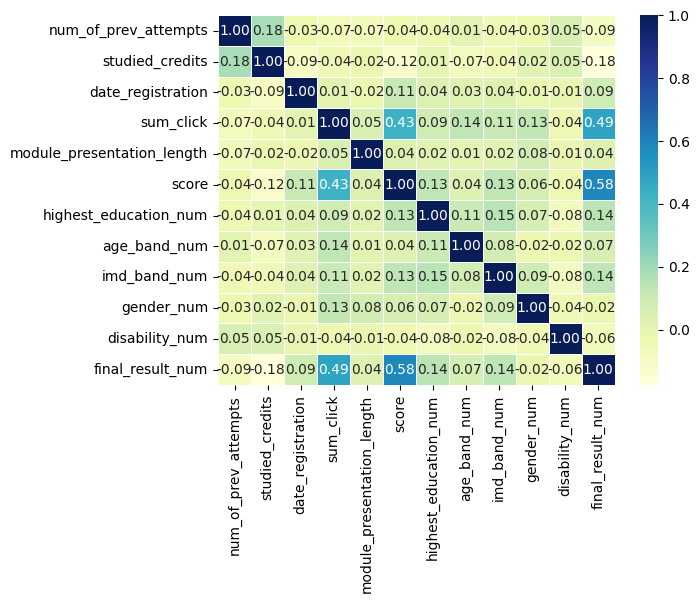

In [30]:
corr_cols = [
    "num_of_prev_attempts",
    "studied_credits",
    "date_registration",
    "sum_click",
    "module_presentation_length",
    "score",
    "highest_education_num",
    "age_band_num",
    "imd_band_num",
    "gender_num",
    "disability_num",
    "final_result_num"
]

df_corr_final = df_corr[corr_cols]
sns.heatmap(df_corr_final.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

Analiza korelacija pokazuje da su score (bodovi prvog zadatka, rani akademski uspjeh studenta) i sum_click (aktivnost i angažiranost studenta) najjače povezani s konačnim ishodom kolegija (final_result). Demografske i socioekonomske varijable pokazuju slabije veze, dok spol i invaliditet nemaju značajnu linearnu povezanost s uspjehom. Rezultati upućuju na to da su ponašajni pokazatelji, poput proaktivnosti i angažmana, informativniji uspjeha od demografskih obilježja.

### Distribucija vrijednosti kategorijske varijable final_result



<Axes: xlabel='final_result'>

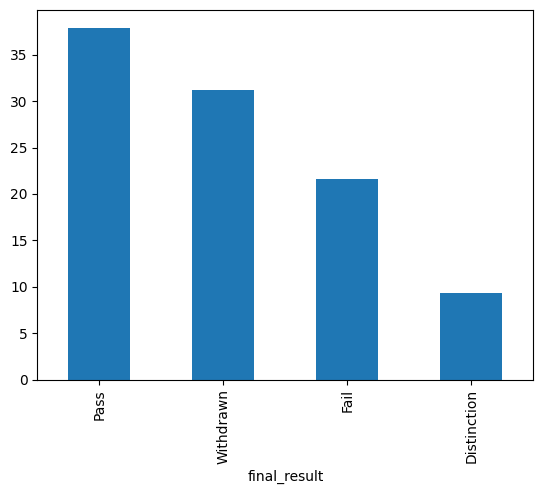

In [31]:
df["final_result"].value_counts(normalize=True).mul(100).plot(kind="bar")

Distribucija krajnjih rezultata (final_result) je uneravnotežena, s iznimno velikim udjelom studenata koji su se povukli s predmeta (Withdrawn). Ovo pokazuje koliko je važno na vrijeme identificirati studente koji su skloni odustajanju.

### Odnosi između varijabli

#### Utjecaj sum_click na final_result

<Axes: title={'center': 'sum_click'}, xlabel='final_result'>

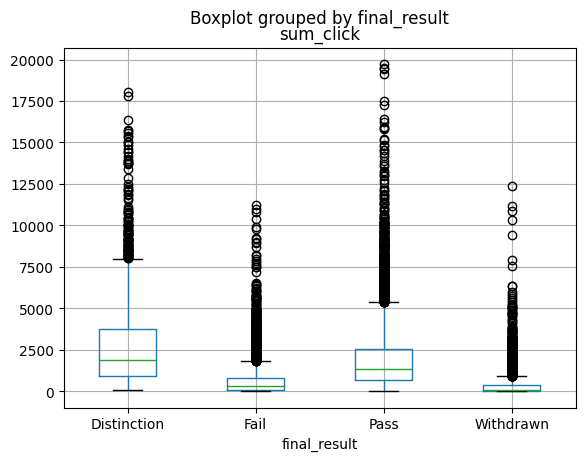

In [32]:
df.boxplot(column="sum_click", by="final_result")

Iz korelacijske matrice iznad, mogli smo vidjeti kako postoji jaka povezanost između broja klikova u VLE-u i final_result pa idemo to detaljnije proučiti. Iz box-plota koji prikazuje odnos numeričke varijable sum_click i kategorijske final_result možemo zaključiti da studenti s više klikova češće prolaze predmete. Vrijednosti medijana za svaku vrijednost final_result su očekivane i poredane od najveće prema najmanjoj: Distinction, Pass, Fail, Withdrawn. Iz grafa se također vidi kako postoji preklapanje stršećih vrijednosti svih vrijednosti varijable final_result što znači da ipak postoji i dosta studenata s puno klikova koji ipak padnu ili se povuku s predmeta. Zaključujemo da broj klikova povećava pozitivan ishod za studenta, ali sam po sebi nije dovoljan uvjet za uspjeh.

#### Utjecaj score na final_result

<Axes: title={'center': 'score'}, xlabel='final_result'>

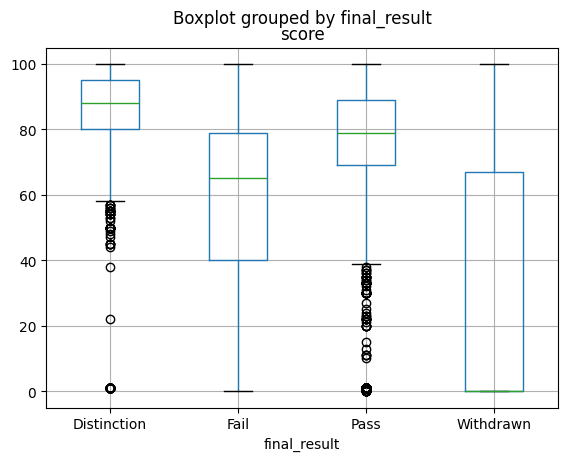

In [33]:
df.boxplot(column="score", by="final_result")

Analiza odnosa rezultata prvog zadatka (score) i završnog ishoda studenata pokazuje da se radi o najsnažnijem pojedinačnom pokazatelju uspjeha u promatranom skupu podataka. Ovo smo također vidjeli i u korelacijskoj matrici. Studenti koji odustaju od kolegija (Withdrawn) u velikoj većini slučajeva ne predaju prvi zadatak ili ostvaruju vrlo nizak rezultat, što jasno razlikuje ovu skupinu od ostalih. S druge strane, studenti koji ostvaruju najbolji završni ishod (Distinction) već u ranoj fazi kolegija pokazuju visoku razinu akademske uspješnosti, uz visoke i relativno stabilne vrijednosti rezultata.

Iako se distribucije rezultata djelomično preklapaju između kategorija Pass i Fail, uočen je jasan i konzistentan trend porasta završnog uspjeha s porastom ranog akademskog učinka. Ovi nalazi upućuju na to da rani rezultati na zadacima predstavljaju ključan signal za identifikaciju studenata u riziku te imaju značajan potencijal za primjenu u sustavima rane detekcije akademskog neuspjeha.

#### Utjecaj studied_credits na final_result

<Axes: title={'center': 'studied_credits'}, xlabel='final_result'>

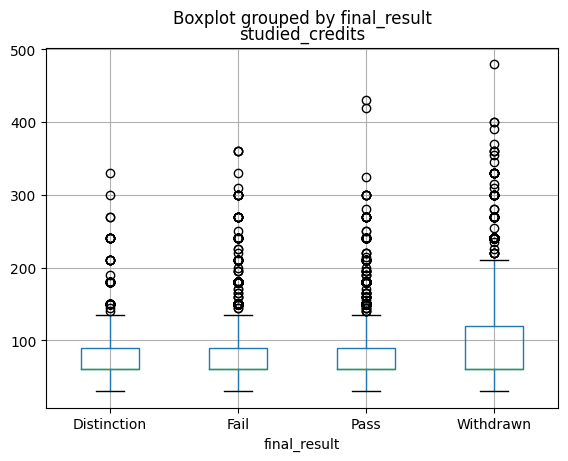

In [34]:
df.boxplot(column="studied_credits", by="final_result")


Boxplot iznad prikazuje odnos varijabli studied_credits i final_result. Možemo vidjeti da postoje vrlo slični medijani i preklapanja IQR-a za Distinction, Fail i Pass što samo znači da studied_credits nije jak prediktor prolaza/pada. Kod Withdrawn vidimo viši medijan i širi IQR s najekstremnijim stršećim vrijednostima. Ovaj trend može upućivati da se ovdje radi o iskusnijim studentima koji odlučuju prekinuti kolegij iz nekog razloga.

#### Utjecaj gender na final_result

<Axes: xlabel='gender'>

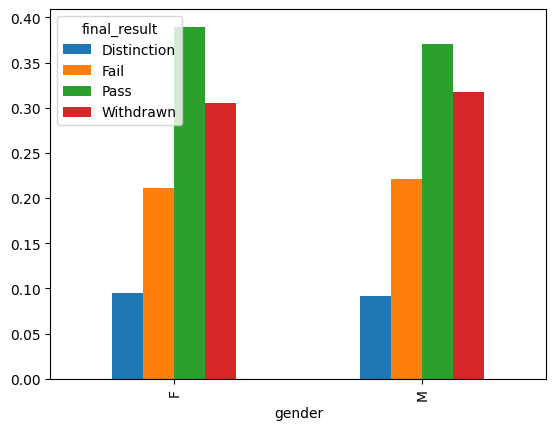

In [35]:
pd.crosstab(df["gender"], df["final_result"], normalize="index").plot(kind="bar")

Analiza završnog ishoda studenata prema spolu pokazuje da su raspodjele ishoda za studentice i studente vrlo slične. Kod oba spola najčešći ishod je Pass. Uočen je nešto veći udio odustajanja (Withdrawn) među studentima muškog spola, dok studentice u nešto većem udjelu ostvaruju najviši ishod (Distinction). Međutim, razlike su umjerene, što upućuje na to da spol sam po sebi vjerojatno nije snažan prediktor završnog ishoda.

#### Utjecaj highest_education na final_result

<Axes: xlabel='highest_education'>

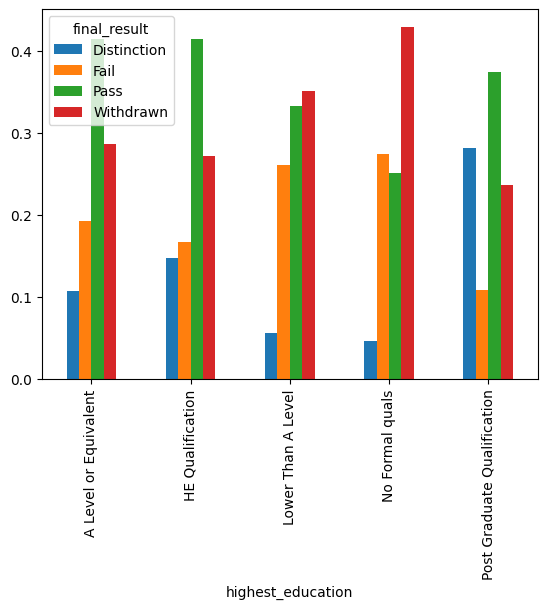

In [36]:
pd.crosstab(df["highest_education"], df["final_result"], normalize="index").plot(kind="bar")

Analiza završnih ishoda studenata prema najvišoj razini prethodnog obrazovanja pokazuje jasan trend prema povoljnijim ishodima kod viših obrazovnih razina. Studenti bez formalnih kvalifikacija i s obrazovanjem nižim od A-levela češće odustaju od kolegija, dok studenti s visokoškolskim i poslijediplomskim kvalifikacijama ostvaruju veći udio uspješnih ishoda, uključujući i najvišu ocjenu (Distinction). Ipak, prisutnost svih ishoda u svim obrazovnim skupinama upućuje na to da prethodno obrazovanje samo po sebi nije dovoljan pokazatelj uspjeha.

#### Koliko rana registracija pouspješuje izglednost uspjeha?

In [37]:
df.groupby("final_result")["date_registration"].median()

final_result
Distinction   -52.0
Fail          -50.0
Pass          -53.0
Withdrawn     -67.0
Name: date_registration, dtype: float64

Analiza vremena registracije pokazuje da studenti koji ostvaruju Pass ili Distinction u prosjeku (koristimo medijan zbog asimetrične distribucije) imaju raniju registraciju u odnosu na studente s ishodom Fail. Zanimljivo, studenti koji su odustali od kolegija (Withdrawn) imaju najraniju registraciju, što može upućivati na neke razloge odustajanja koji nama nisu poznati, a ne nužno na akademski rizik. Ovi rezultati sugeriraju da rana registracija sama po sebi nije dovoljan pokazatelj uspjeha.

#### Postoje li razlike u ishodima studiranja s obzirom na invaliditet?

In [38]:
pd.crosstab(
    df["disability"],
    df["final_result"],
    normalize="index"
)


final_result,Distinction,Fail,Pass,Withdrawn
disability,,,,
N,0.095191,0.215463,0.386576,0.302770
Y,0.070547,0.225245,0.310661,0.393546


Rezultati ukazuju da studenti s invaliditetom ne ostvaruju značajno lošije akademske rezultate, ali češće prekidaju studij, što može upućivati na (ne)akademske prepreke tijekom studiranja. Varijabla disability ne razlikuje niti težinu niti vrtu invaliditeta, a u podacima i članku ne možemo naći informacije koje upućuju da postoji prilagodba programa za takve studente, što nas ograničava u donošenju snažnijih zaključaka.

#### Jesu li studenti skloniji padu ili ispisu ako je kolegij dulji?

In [39]:
df.groupby("final_result")["module_presentation_length"].median()


final_result
Distinction    262.0
Fail           261.0
Pass           262.0
Withdrawn      262.0
Name: module_presentation_length, dtype: float64

Rezultati ukazuju na to da duljina trajanja kolegija ne pokazuje značajan utjecaj na ishod polaganja određenog kolegija.